<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Major Neural Network Architectures Challenge
## *Data Science Unit 4 Sprint 3 Challenge*

In this sprint challenge, you'll explore some of the cutting edge of Data Science. This week we studied several famous neural network architectures: 
recurrent neural networks (RNNs), long short-term memory (LSTMs), convolutional neural networks (CNNs), and Generative Adverserial Networks (GANs). In this sprint challenge, you will revisit these models. Remember, we are testing your knowledge of these architectures not your ability to fit a model with high accuracy. 

__*Caution:*__  these approaches can be pretty heavy computationally. All problems were designed so that you should be able to achieve results within at most 5-10 minutes of runtime on Colab or a comparable environment. If something is running longer, doublecheck your approach!

## Challenge Objectives
*You should be able to:*
* <a href="#p1">Part 1</a>: Train a RNN classification model
* <a href="#p2">Part 2</a>: Utilize a pre-trained CNN for objective detection
* <a href="#p3">Part 3</a>: Describe the components of an autoencoder
* <a href="#p4">Part 4</a>: Describe yourself as a Data Science and elucidate your vision of AI

<a id="p1"></a>
## Part 1 - RNNs

Use an RNN/LSTM to fit a multi-class classification model on reuters news articles to distinguish topics of articles. The data is already encoded properly for use in an RNN model. 

Your Tasks: 
- Use Keras to fit a predictive model, classifying news articles into topics. 
- Report your overall score and accuracy

For reference, the [Keras IMDB sentiment classification example](https://github.com/keras-team/keras/blob/master/examples/imdb_lstm.py) will be useful, as well the RNN code we used in class.

__*Note:*__  Focus on getting a running model, not on maxing accuracy with extreme data size or epoch numbers. Only revisit and push accuracy if you get everything else done!

In [0]:
from tensorflow.keras.datasets import reuters

(X_train, y_train), (X_test, y_test) = reuters.load_data(num_words=None,
                                                         skip_top=0,
                                                         maxlen=None,
                                                         test_split=0.2,
                                                         seed=723812,
                                                         start_char=1,
                                                         oov_char=2,
                                                         index_from=3)

In [52]:
# Demo of encoding

word_index = reuters.get_word_index(path="reuters_word_index.json")

print(f"Iran is encoded as {word_index['iran']} in the data")
print(f"London is encoded as {word_index['london']} in the data")
print("Words are encoded as numbers in our dataset.")

Iran is encoded as 779 in the data
London is encoded as 544 in the data
Words are encoded as numbers in our dataset.


In [0]:
# word_index

In [54]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM

batch_size = 64
max_features = len(word_index.values())
maxlen = 200

print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

print('Pad sequences (samples x time)')
X_train = sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)


print('Build model...')
# TODO - your code!



8982 train sequences
2246 test sequences
Pad sequences (samples x time)
X_train shape: (8982, 200)
X_test shape: (2246, 200)
Build model...


In [55]:
X_train[0].shape

(200,)

In [0]:
model = Sequential()
model.add(Embedding(max_features, 200))
model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
# model.add(LSTM(200, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))


In [57]:
# You should only run this cell once your model has been properly configured

model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

print('Train...')
model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=5,
          validation_data=(X_test, y_test))

score, acc = model.evaluate(X_test, y_test,
                            batch_size=batch_size)
print('Test score:', score)
print('Test accuracy:', acc)

Train...
Train on 8982 samples, validate on 2246 samples
Epoch 1/5
8982/8982 [==============================] - 79s 9ms/sample - loss: nan - acc: 0.0497 - val_loss: nan - val_acc: 0.0396
Epoch 2/5
8982/8982 [==============================] - 67s 7ms/sample - loss: nan - acc: 0.0499 - val_loss: nan - val_acc: 0.0396
Epoch 3/5
8982/8982 [==============================] - 67s 7ms/sample - loss: nan - acc: 0.0499 - val_loss: nan - val_acc: 0.0396
Epoch 4/5
8982/8982 [==============================] - 67s 7ms/sample - loss: nan - acc: 0.0499 - val_loss: nan - val_acc: 0.0392
Epoch 5/5
2246/2246 [==============================] - 4s 2ms/sample - loss: nan - acc: 0.0396
Test score: nan
Test accuracy: 0.039626002


This is terrible performance. Not sure what I'm doing wrong here, but I don't have time to fix it.

## Sequence Data Question
#### *Describe the `pad_sequences` method used on the training dataset. What does it do? Why do you need it?*

This method "pads" sequences to ensure they are the same length, making them all equal to the length of the longest sequence or the maxlen value specified.

## RNNs versus LSTMs
#### *What are the primary motivations behind using Long-ShortTerm Memory Cell unit over traditional Recurrent Neural Networks?*

RNNs cannot perform well on data with long-range dependencies (such as long-form text), because of the "vanishing gradient" problem: the gradient of the loss function decays exponentially over time. A weight less than 1 will quickly approach zero. This is solved by adding memory cells to the hiddens neurons, creating LSTM units. These units can remember long-range dependencies, using gates for learning and forgetting information over time.

## RNN / LSTM Use Cases
#### *Name and Describe 3 Use Cases of LSTMs or RNNs and why they are suited to that use case*

Speech to text: interpreting spoken word from a waveform. LSTMs would be good for this due to the high temporal resolution required for voice data.

Autocompleting words: RNNs could be used for this because it doesn't require very long memory. LSTMs could be used to generate the next word in the sentence. LSTMs outperform Markov chains here because they're less sensitive to gap length.

Image captioning: LSTMs can use attention to keep track of which speaker is speaking.

<a id="p2"></a>
## Part 2- CNNs

### Find the Frog

Time to play "find the frog!" Use Keras and ResNet50 (pre-trained) to detect which of the following images contain frogs:

<img align="left" src="https://d3i6fh83elv35t.cloudfront.net/newshour/app/uploads/2017/03/GettyImages-654745934-1024x687.jpg" width=400>


In [23]:
!pip install google_images_download

     |████████████████████████████████| 911kB 9.6MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=3af541cae4f171f5cae7e5eee66529f7a129cbfea22ecd094f7e0c475c9852ac
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [24]:
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()
arguments = {"keywords": "lilly frog pond", "limit": 5, "print_urls": True}
absolute_image_paths = response.download(arguments)


Item no.: 1 --> Item name = lilly frog pond
Evaluating...
Starting Download...
Image URL: https://img-aws.ehowcdn.com/350x235p/photos.demandstudios.com/getty/article/110/213/78036715_XS.jpg
Completed Image ====> 1.78036715_XS.jpg
Image URL: https://www.maxpixel.net/static/photo/1x/Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Completed Image ====> 2.Nature-Bull-Frog-Pond-Green-Lily-Pad-Frog-2526024.jpg
Image URL: https://c8.alamy.com/comp/C63A50/green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Completed Image ====> 3.green-frog-floating-on-a-water-lily-pad-in-a-pond-with-pink-flowers-C63A50.jpg
Image URL: https://cdn.pixabay.com/photo/2018/07/29/16/11/water-lilies-3570439_960_720.jpg
Completed Image ====> 4.water-lilies-3570439_960_720.jpg
Image URL: https://www.welcomewildlife.com/wp-content/uploads/2015/01/Frog-on-lily-pad.jpg
Completed Image ====> 5.Frog-on-lily-pad.jpg

Errors: 0



At time of writing at least a few do, but since the Internet changes - it is possible your 5 won't. You can easily verify yourself, and (once you have working code) increase the number of images you pull to be more sure of getting a frog. Your goal is to validly run ResNet50 on the input images - don't worry about tuning or improving the model.

*Hint* - ResNet 50 doesn't just return "frog". The three labels it has for frogs are: `bullfrog, tree frog, tailed frog`

*Stretch goals* 
- Check for fish or other labels
- Create a matplotlib visualizations of the images and your prediction as the visualization label

In [0]:
images = absolute_image_paths[0]['lilly frog pond']

In [0]:
# You've got something to do in this cell. ;)

import numpy as np

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

def process_img_path(img_path):
  return image.load_img(img_path, target_size=(224, 224))

def img_contains_frog(img):
    """ Scans image for Frogs
    
    Should return a boolean (True/False) if a frog is in the image.
    
    Inputs:
    ---------
    img:  Precrossed image ready for prediction. The `process_img_path`             function should already be applied to the image. 
    
    Returns: 
    ---------
    frogs (boolean):  TRUE or FALSE - There are frogs in the image.
    
    """
    # Your Code Here
    # TODO - your code!
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    model = ResNet50(weights='imagenet')
    features = model.predict(x)
    results = decode_predictions(features, top=3)[0]
    print(results)
    for entry in results:
      if entry[1] in ['bullfrog', 'tree frog', 'tailed frog']:
        return entry


    return None

In [41]:
for i in images:
  print(img_contains_frog(process_img_path(i)))

[('n04409515', 'tennis_ball', 0.7831616), ('n03991062', 'pot', 0.21500598), ('n01737021', 'water_snake', 0.0004802733)]
None
[('n01644373', 'tree_frog', 0.93951225), ('n01644900', 'tailed_frog', 0.03623381), ('n01641577', 'bullfrog', 0.018151501)]
('n01641577', 'bullfrog', 0.018151501)
[('n01641577', 'bullfrog', 0.48182517), ('n01667778', 'terrapin', 0.25911266), ('n01698640', 'American_alligator', 0.14980651)]
('n01641577', 'bullfrog', 0.48182517)
[('n02206856', 'bee', 0.32981458), ('n01943899', 'conch', 0.08043046), ('n11939491', 'daisy', 0.07676382)]
None
[('n02190166', 'fly', 0.13405181), ('n07718472', 'cucumber', 0.11413092), ('n07716358', 'zucchini', 0.08889653)]
None


#### Stretch Goal: Displaying Predictions

In [0]:
import matplotlib.pyplot as plt

[('n04409515', 'tennis_ball', 0.7831616), ('n03991062', 'pot', 0.21500598), ('n01737021', 'water_snake', 0.0004802733)]
[('n01644373', 'tree_frog', 0.93951225), ('n01644900', 'tailed_frog', 0.03623381), ('n01641577', 'bullfrog', 0.018151501)]
[('n01641577', 'bullfrog', 0.48182517), ('n01667778', 'terrapin', 0.25911266), ('n01698640', 'American_alligator', 0.14980651)]
[('n02206856', 'bee', 0.32981458), ('n01943899', 'conch', 0.08043046), ('n11939491', 'daisy', 0.07676382)]
[('n02190166', 'fly', 0.13405181), ('n07718472', 'cucumber', 0.11413092), ('n07716358', 'zucchini', 0.08889653)]


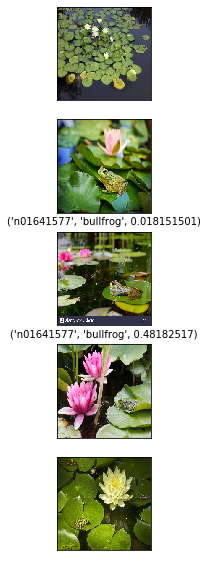

In [71]:
plt.figure(figsize=(10,10))
for i, j in enumerate(images):
  plt.subplot(5, 1, int(i)+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(process_img_path(j))
  plt.xlabel(img_contains_frog(process_img_path(j)))
plt.show()

<a id="p3"></a>
## Part 3 - Autoencoders

Describe a use case for an autoencoder given that an autoencoder tries to predict its own input. 

__*Your Answer:*__ 
An autoencoder can be used to detect simple forgeries, for example doctored images that are presented as news. If it were trained on non-doctored images, then a prediction with high error would indicate a high likelihood of doctoring. You could get much more complicated than that too. 

<a id="p4"></a>
## Part 4 - More...

Answer the following questions, with a target audience of a fellow Data Scientist:

- What do you consider your strongest area, as a Data Scientist?

My strongest area is my research ability. Being a nerd with a business degree means that on any project, you start your research with questions about the use case. Before I start any project, I ask myself what the user wants, different ways they could get it, and what constitutes success. Then I ask whether such a thing exists yet, whether in part or in whole. I pride myself on my ability to find this information and investigate knowledge domains where I have little experience.
 

- What area of Data Science would you most like to learn more about, and why?

I'd like to learn more about data science for plant genomics. It's a high-growth area with a potential to improve people's lives through improved crop resistance. They have to process large amounts of data and model very complex interactions between genes and environmental factors. The applications for deep learning in this area are still being explored, and I'd like to contribute to that somehow.

- Where do you think Data Science will be in 5 years?

In 5 years the hype surrounding data science will have died down a bit as people find more ways to articulate how dumb machine learning actually is. Data engineers will be in higher demand as more companies will have set up their infrastructure with big data in mind. 

- What are the threats posed by AI to our society?

AGI poses a certain existential threat due to the likelihood that many possible AGIs converge on maximation of computing resources as an instrumental goal (regardless of their ultimate goals). However low or distant this threat is, researchers of AGI systems should still do considerable work mitigating that risk.

- How do you think we can counteract those threats? 

Research into causality can help us build systems that deliberate over options, considering the side-effects of one's actions. Game theory and decision theory are most sorely needed to derive a representation of the goals that humans would want AI to pursue (or the path to uncovering those goals procedurally, given a set of heuristic constraints). I suspect category theory has something to contribute to machine morality, but I don't know enough about it to say any more.

- Do you think achieving General Artifical Intelligence is ever possible?

Yes, I think it will be constructed within the next century. The missing pieces of an artificial mind are substantial: ability to generalize learning, imagination, sense of self, ability to conceive of goals over an indefinite time frame. But of these, only the first attribute seems to be a requirement for AGI. Depending on where cryptography goes in this century, we may end up with a very dumb system that has control over the world's tech infrastructure. I hope that AGI researchers take necessary precautions and keep their prototypes hermetically sealed with safeguards and behavioral tripwires.


A few sentences per answer is fine - only elaborate if time allows.

## Congratulations! 

Thank you for your hard work, and congratulations! You've learned a lot, and you should proudly call yourself a Data Scientist.


In [42]:
from IPython.display import HTML

HTML("""<iframe src="https://giphy.com/embed/26xivLqkv86uJzqWk" width="480" height="270" frameBorder="0" class="giphy-embed" allowFullScreen></iframe><p><a href="https://giphy.com/gifs/mumm-champagne-saber-26xivLqkv86uJzqWk">via GIPHY</a></p>""")